# Lesson 10 - Logistic Regression (for Classification)

### The following topics are discussed in this notebook:
* Logistic regression background
* Performing logistic regression using scikit-learn.

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Statistical Learning, Section 4.3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Prelimary: The Sigmoid Function

The **sigmoid** or **logistic** function is given by the following formula:

$\Large \sigma(z) = \frac{e^z}{1+e^z} = \frac{1}{1 + e^{-z}}$

A plot of the sigmoid function is shown below.

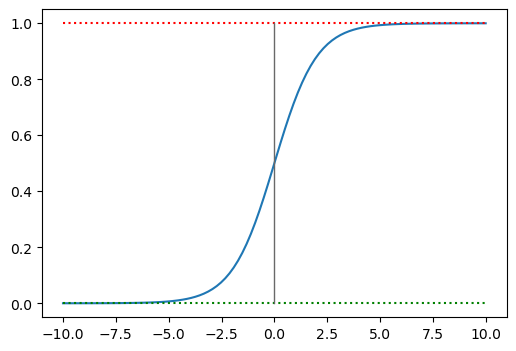

In [2]:
z = np.linspace(-10,10,100)
#get the y-values for the sigmoid function
y = 1 / (1 + np.exp(-z))

plt.close()
#size of the plotting window
plt.rcParams["figure.figsize"] = [6,4]
#plot the sigmoid
plt.plot(z,y)
#plot the two horizontal and one vertical line
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="g")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

# Logistic Regresion

Logistic regression is a probabilistic linear classification method that can be used to estimate the probability that an observation belongs to a particular class based on the feature values. Logistic regression can be adapted for use in multi-class classification problems, but we will begin by discussing the standard version of the algorithm, which is a binary classifier. 

In [3]:
-(np.log(.9608) + np.log(.0521))

2.9945793384391792

## Form of the Logistic Regression Model 

* Assume we have several features, $X = [x^{(1)}, x^{(2)}, ..., x^{(k)}]$.


* We wish to predict the value of a categorical label $y$. Assume the classes of $y$ are coded as 0 and 1. 


* Let $ p \approx P \left[ y = 1 ~|~ X = x \right]$. 


* That is, $ p$ is an estimate of the probability that an observation belongs to class 1, given some specific set of feature values, $X = x$.


* We will assume that $ p$ follows a model of the form: $\enspace \LARGE p = \frac {1} {
1 + exp{\left(-\left[b_0 + b_1 x^{(1)} + b_2 x^{(2)} ... + b_k x^{(k)}\right]\right)}
}$


## Defining the Loss Function: Negative Log-Likelihood

* Let $b_0, b_1, ..., b_p$ be a set (not necessarily optimal) parameter values used to define a model $\enspace\large p = \frac {1} {1 + \exp\left(-\left[{b}_0 + {b}_1 x^{(1)} + {b}_2 x^{(2)} ... + {b}_p x^{(p)}\right]\right)}$.


* For each training observation, calculate $\enspace\large p_i = \frac {1} {1 + \exp\left[-\left({b}_0 + {b}_1 x_i^{(1)} + {b}_2 x_i^{(2)} ... + {b}_p x_i^{(p)}\right)\right]}$.


* For each $i$, define $\pi_i$ as follows: $
\quad\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = 1 \\
            1 - p_i & \text{if  } ~y_i = 0
        \end{array}
    \right.$
    
    
* Then $\pi_i$ is the estimate our current model provides for the probability that observation $i$ falls into its actual observed class. 


* We want to choose a model that maximizes the probability of getting the set of labels we have observed. In otherwise, we want to maximize the likelihood score, $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n$.


* From a computational standpoint, it is generally easy to maximize log-likelihood: $\ln L = \ln(\pi_1) + \ln(\pi_2) + ... + \ln(\pi_n)$


* We will use the **`minimize()`** function from `scipy` to minimize the loss function $-\ln L$, which is equivalent to maximizing $\ln L$.


* As with linear regression, we will denote the optimal parameter values as $\hat\beta_0, \hat\beta_1, \hat\beta_2, ..., \hat\beta_k$. 


* We will use $\hat p$ to denote predicted probabilities calculated using the optimal model.

## Using a Logistic Regression Model to Make Predictions

* Define a threshold value $t$. In general, we will use $t = 0.5$.

* Given a set of observed features, $X$, we first calculate $\hat p$ using our optimal model. We then classify the observation as follows: $
\quad\hat y = \left\{
        \begin{array}{ll}
            0 & \text{if  } \hat p < t \\
            1 & \text{if  } \hat p \geq t
        \end{array}
    \right.$

In [4]:
%run -i snippets/snippet05.py

Output()

# Example 1: Tiny Dataset, Two Features

In [5]:
%run -i snippets/snippet06.py

## Calculating Log Likelihood for a Proposed Model

In [6]:
x1 = np.array([1, 2, 2, 4, 5]).reshape(5,1)
x2 = np.array([5, 8, 3, 1, 2]).reshape(5,1)
X = np.concatenate([x1, x2], axis = 1)
label = np.array(['r', 'b', 'b', 'r', 'b'])
y = np.where(label == 'b', 1, 0)

print(X)
print()
print(label)
print(y)

[[1 5]
 [2 8]
 [2 3]
 [4 1]
 [5 2]]

['r' 'b' 'b' 'r' 'b']
[0 1 1 0 1]


In [7]:
beta = np.array([-1.2, -0.8, 0.5]).reshape(-1,1)

ones = np.ones([5,1])
X_ = np.hstack([ones, X])
z = np.dot(X_, beta).reshape(-1,)
p = 1 / (1 + np.exp(-z))
pi = np.where(y == 1, p, 1 - p)

NLL = -np.sum(np.log(pi))

print('p  =', p)
print('pi =', pi)
print()
print('Negative Log-Likelihood =', NLL)


p  = [0.62245933 0.76852478 0.21416502 0.01984031 0.01477403]
pi = [0.37754067 0.76852478 0.21416502 0.98015969 0.01477403]

Negative Log-Likelihood = 7.013291927283447


## Using Scikit-Learn to Perform Logistic Regression


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(solver='lbfgs', C=1e9)
model.fit(X, y)

print(model.intercept_)
print(model.coef_)

[-5.76181926]
[[1.15894267 0.86913785]]


## Making Predictions

In [10]:
X_new = np.array([[1,4], [2,6], [3,3]])
print(model.predict(X_new))

[0 1 1]


### Model Accuracy

In [11]:
print('Accuracy:', model.score(X,y))


Accuracy: 0.8


# Example 2: Synthetic Dataset, Two Features

Synthetic data is any information manufactured artificially which does not represent events or objects in the real world. Algorithms create synthetic data used in model datasets for testing or training purposes. The synthetic data can mimic operational or production data and help train machine learning (ML) models or test out mathematical models.

Synthetic data offers several important benefits: it minimizes the constraints associated with the use of regulated or sensitive data, it can be used to customize data to match conditions that real data does not allow, and it can be used to generate large training datasets without requiring manual labeling of data.

In [12]:
from ClassificationPlotter import plot_regions
from sklearn.datasets import make_moons

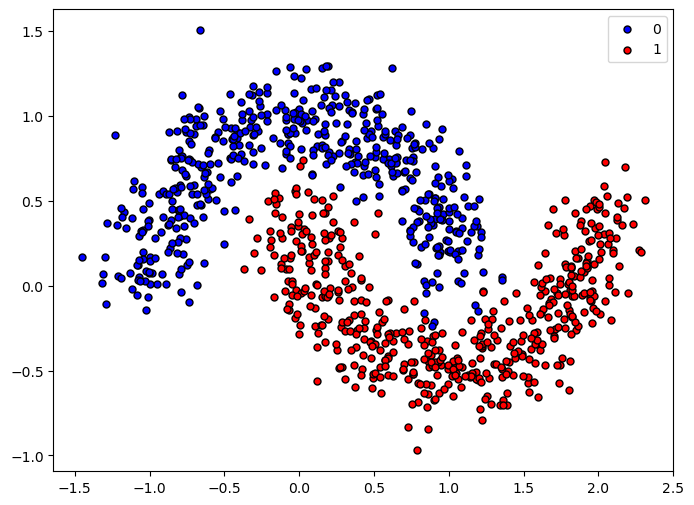

In [13]:
np.random.seed(1)
X, y = make_moons(n_samples=1000, noise=0.15)

plt.close()
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', c='b', s=25, edgecolor='k', label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='r', s=25, edgecolor='k', label=1)
plt.legend()
plt.show()

In [14]:
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X,y)

print('Intercept:', lr_model.intercept_)
print('Coefficients:', lr_model.coef_)
print('Accuracy:', lr_model.score(X,y))

Intercept: [0.67893511]
Coefficients: [[ 1.13608991 -4.89536672]]
Accuracy: 0.877


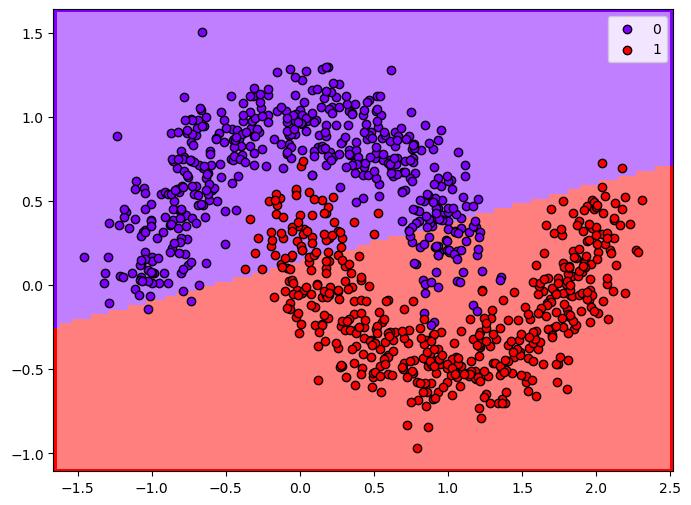

In [15]:
plot_regions(lr_model, X, y, fig_size=[8,6])

In [16]:
X_new = np.array([[-1,-.5], [0,1], [2,.8]])
print(lr_model.predict(X_new))

[1 0 0]


# Example 3: Three Features, Concentric Rings 

In [17]:
df = pd.read_table("Data/3drings.txt", sep='\t')
print(df.head())

         x1        x2         x3  y
0 -0.903059 -0.091599  12.994658  0
1  0.232524 -0.004573  12.022049  1
2  0.215563 -0.223809  12.258246  1
3 -0.318782 -0.051883  12.620665  1
4  0.776826 -0.609386  11.832560  0


In [18]:
import seaborn as sns

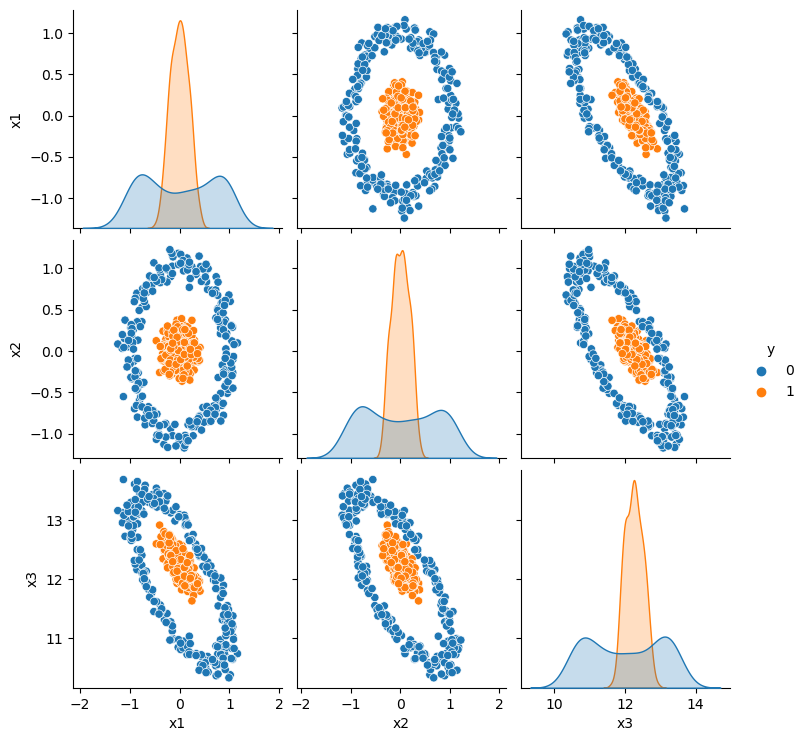

In [19]:
plt.close()
sns.pairplot(data=df, hue='y', vars=['x1','x2','x3'])
#sns.pairplot(df, hue='y')
plt.show()

In [20]:
X = df.iloc[:,:3].values
y = df.iloc[:,3].values
print(X)
print(y)

[[-9.03059443e-01 -9.15987070e-02  1.29946581e+01]
 [ 2.32523592e-01 -4.57307000e-03  1.20220495e+01]
 [ 2.15563247e-01 -2.23808952e-01  1.22582457e+01]
 ...
 [ 3.58804571e-01 -3.28480900e-02  1.19240435e+01]
 [ 7.60613509e-01  3.80665682e-01  1.08587208e+01]
 [-6.14926181e-01 -7.81896586e-01  1.33968228e+01]]
[0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 1 0 1 1 0 

In [21]:
lr_rings = LogisticRegression(C=1e10, solver='lbfgs')
lr_rings.fit(X,y)

print('Intercept:', lr_rings.intercept_)
print('Coefficients:', lr_rings.coef_)
print('Accuracy:', lr_rings.score(X,y))

Intercept: [-2334.61701558]
Coefficients: [[190.59580595 204.62880892 192.10390343]]
Accuracy: 1.0


In [22]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


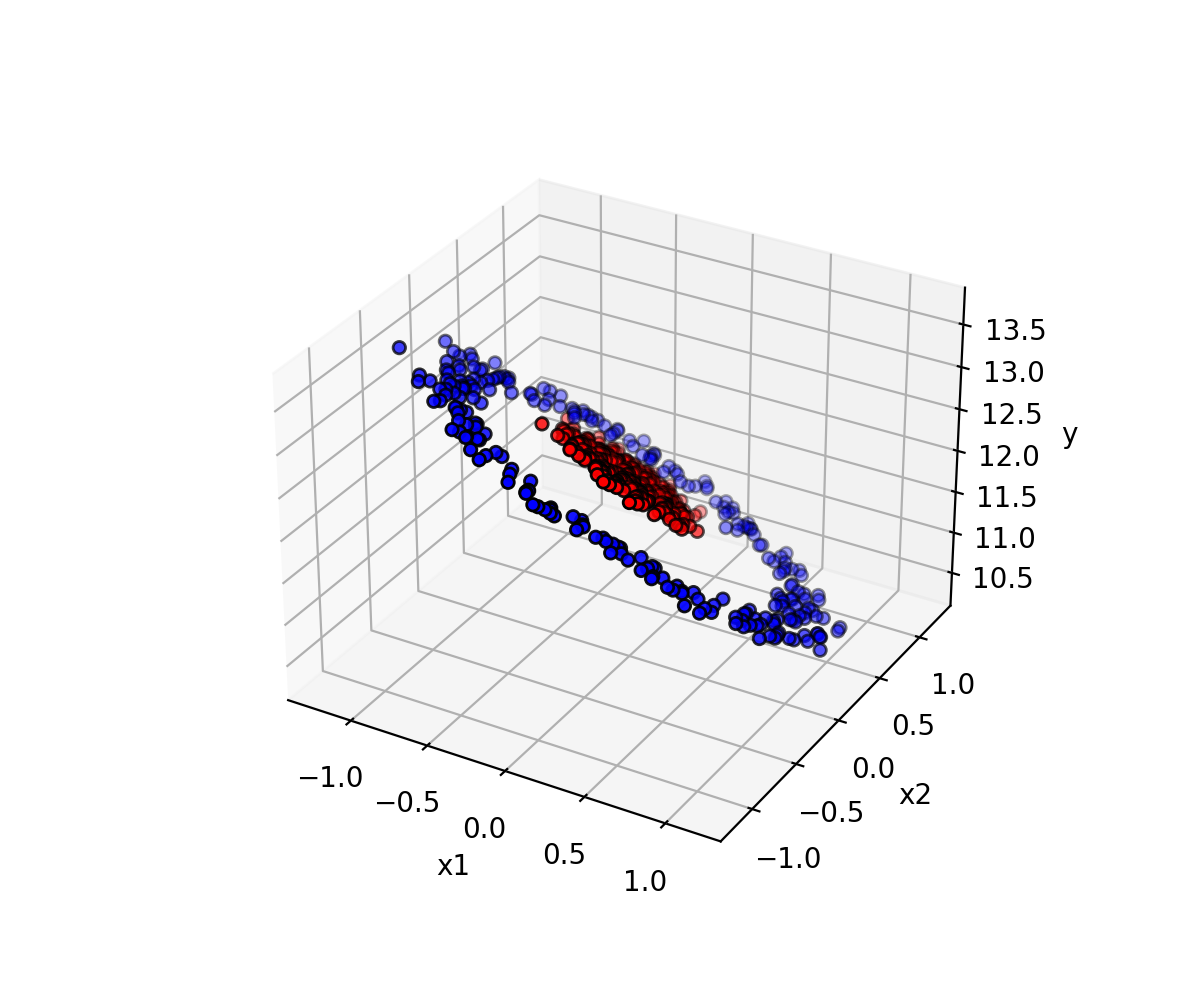

/var/folders/s2/qv5gt96j6_jc62hfrsc11r8h0000gn/T/ipykernel_25982/1492836044.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


In [23]:
%matplotlib notebook
plt.close()
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], s=20, marker = 'o', c='b', edgecolor='k', label=0)
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], s=20, marker = 'o', c='r', edgecolor='k', label=1)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.show()

In [24]:
X_new = np.array([[-1,-.5, 1], [2,.8, 33.1], [ 2.32523592e-01, -4.57307000e-03,  1.20220495e+01]   ])
print(lr_rings.predict(X_new))

[0 1 1]
